In [1]:
# ket noi den drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
#thong ke va ve do thi
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [3]:
#đọc dữ liệu
df_data = pd.read_csv('/content/gdrive/MyDrive/dữ liệu khách hàng/online_retail_II.csv', encoding='latin1')
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#Kiểm tra kiểu dữ liệu
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


**Làm sạch dữ liệu**

In [5]:
# Bước tính toán ban đầu xem
cust_country = df_data[['Country', 'Customer ID']].drop_duplicates()
result = cust_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

# Bỏ cột index
result.reset_index(drop=True, inplace=True)

# Hiển thị kết quả
print(result)

                 Country  Customer ID
0         United Kingdom         5410
1                Germany          107
2                 France           95
3                  Spain           41
4                Belgium           29
5               Portugal           24
6            Netherlands           23
7            Switzerland           22
8                 Sweden           19
9                  Italy           17
10             Australia           15
11               Finland           15
12       Channel Islands           14
13               Austria           13
14                Norway           13
15               Denmark           12
16                Cyprus           11
17                 Japan           10
18                   USA            9
19           Unspecified            7
20                Poland            6
21                Canada            5
22                Greece            5
23                  EIRE            5
24  United Arab Emirates            4
25          

In [6]:
#Lọc lấy dữ liệu khách hàng ở UK
df_data = df_data.query("Country== 'United Kingdom'").reset_index(drop=True)

In [7]:
#ID Khách hàng có giá trị null
print('Số lượng khách hàng ID là null: ',df_data['Customer ID'].isnull().sum())

Số lượng khách hàng ID là null:  240029


In [9]:
#Bỏ qua dữ liệu những khách hàng có id là null
df_data = df_data[df_data['Customer ID'].notna()==True]


In [8]:
#Lọc giá có = 0 không
df_data[df_data['Price']==0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
224,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
244,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
245,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
401,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
2844,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


In [10]:
#Lọc giá có âm không
df_data[df_data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [11]:
#Loại bỏ giá = 0
index_name = df_data[(df_data['Price']==0)].index
df_data.drop(index_name, inplace = True)

In [12]:
#data start
#Xem hóa đơn đầu tiên
df_data['InvoiceDate'].min()

'2009-12-01 07:45:00'

In [13]:
#Xem hóa đơn cuối cùng
#data stop
df_data['InvoiceDate'].max()

'2011-12-09 12:49:00'

**Tập dữ liệu có các bản ghi từ ngày 01/12/2009 đến ngày 09/12/2011**

In [14]:
#Lọc số lượng = 0
df_data[df_data['Quantity']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [15]:
df_data[df_data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
158,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
159,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
160,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
161,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
979985,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
981041,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
981215,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
981216,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


**Có 16005 bản ghi có số lượng âm. Điều này là do mục nhập Hóa đơn tương ứng đã bị hủy -> Hóa đơn bắt đầu bằng 'C' cho các giao dịch bị hủy**


In [16]:
#Loại bỏ những hóa đơn có chữ C -> bị cancel
index_name = df_data[(df_data['Quantity']<0)].index
df_data.drop(index_name, inplace = True)

In [17]:
#Lọc các hàng có giá trị NaN (Not a Number) trong cột Description.
df_data[df_data['Description'].isna()]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [18]:
#Tạo cột tính tổng giá dựa trên số lượng và giá TotalPrice = Price * Quantity
df_data['TotalPrice'] = df_data['Quantity'] * df_data['Price']

In [19]:
#Get the top customers
df_data.groupby("Customer ID")["TotalPrice"].sum()

,TotalPrice
Customer ID,
12346.0,77556.46
12608.0,415.79
12745.0,723.85
12746.0,254.55
12747.0,9276.54
...,...
18283.0,2736.65
18284.0,461.68
18285.0,427.00


In [20]:
#Data sau khi dc clean
df_data2 = df_data.copy(deep=True)
df_data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [21]:
df_data2.shape

(725250, 9)

**RFM Modelling**

In [22]:
#Chỉ định ngày tiếp theo sau ngày cuối cùng được ghi trong tập dữ liệu là 'ngày_hôm nay'
today_date = dt.datetime(2011, 12, 11)

In [23]:
#Thay đổi kiểu dữ liệu InvoiceDate thành datetime
df_data2['InvoiceDate'] = df_data2['InvoiceDate'].astype('datetime64[ns]')


 **Recency gần đây được tính bằng cách lấy ngày hôm nay - ngày cuối cùng
 khách hàng mua hàng.
Frequency được tính bằng cách lấy số lượng hóa đơn duy nhất.
Moneytary value được tính bằng cách lấy tổng giá**

In [24]:
rfm = df_data2.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})


In [25]:
rfm=rfm.reset_index()
rfm.head()

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,326,12,77556.46
1,12608.0,405,1,415.79
2,12745.0,487,2,723.85
3,12746.0,541,1,254.55
4,12747.0,3,26,9276.54


In [26]:
#renaming the column names
rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12608.0,405,1,415.79
2,12745.0,487,2,723.85
3,12746.0,541,1,254.55
4,12747.0,3,26,9276.54


In [27]:

rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000,5350.000000
mean,15557.362617,203.546168,6.269346,2751.990190
std,1581.161762,209.973818,11.995550,12080.466564
min,12346.000000,1.000000,1.000000,2.950000
25%,14191.250000,26.000000,1.000000,336.167500
50%,15565.500000,99.000000,3.000000,849.910000
75%,16922.750000,382.000000,7.000000,2214.905000
max,18287.000000,739.000000,336.000000,608821.650000


In [28]:
#Chi thành 4 phân đoạn
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [29]:
quantiles

{'CustomerID': {0.25: 14191.25, 0.5: 15565.5, 0.75: 16922.75},
 'Recency': {0.25: 26.0, 0.5: 99.0, 0.75: 382.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Monetary': {0.25: 336.1675000000001, 0.5: 849.9100000000001, 0.75: 2214.905}}

In [30]:
#Phân đoạn cho RFM
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [31]:
#Áp dụng
rfm['R'] = rfm['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm['M'] = rfm['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,12,77556.46,3,1,1
1,12608.0,405,1,415.79,4,4,3
2,12745.0,487,2,723.85,4,3,3
3,12746.0,541,1,254.55,4,4,4
4,12747.0,3,26,9276.54,1,1,1


In [32]:
#Tính điểm và thêm cột RFMGroup để hiển thị điểm kết hợp tổng hợp của RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

#Tính điểm và thêm cột RFMScore để hiển thị tổng tổng giá trị RFMGroup
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346.0,326,12,77556.46,3,1,1,311,5
1,12608.0,405,1,415.79,4,4,3,443,11
2,12745.0,487,2,723.85,4,3,3,433,10
3,12746.0,541,1,254.55,4,4,4,444,12
4,12747.0,3,26,9276.54,1,1,1,111,3


In [33]:
#Chỉ định nhóm khách hàng
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Loyalty_Level'] = Score_cuts.values
rfm.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum
1,1,12608.0,405,1,415.79,4,4,3,443,11,Bronze
2,2,12745.0,487,2,723.85,4,3,3,433,10,Silver
3,3,12746.0,541,1,254.55,4,4,4,444,12,Bronze
4,4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum


In [34]:
#Xác thực dữ liệu cho RFMGroup = 111
rfm[rfm['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,5165,18102.0,1,145,608821.65,1,1,1,111,3,Platinum
1,4527,17450.0,9,51,246973.09,1,1,1,111,3,Platinum
2,857,13694.0,4,143,196482.81,1,1,1,111,3,Platinum
3,4585,17511.0,3,60,175603.55,1,1,1,111,3,Platinum
4,3776,16684.0,5,55,147142.77,1,1,1,111,3,Platinum


<Axes: xlabel='Monetary', ylabel='Density'>

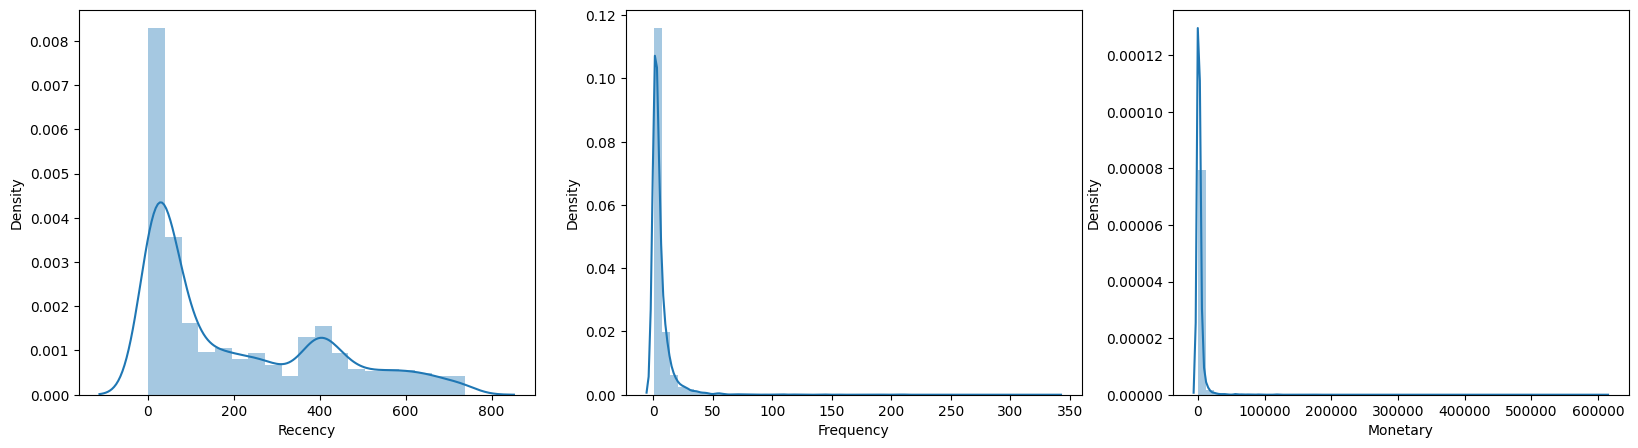

In [35]:
#Biểu đồ phân phối dữ liệu
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'])


In [36]:
#sử dụng log transformation
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

In [ ]:
rfm_log.head()

,Recency,Frequency,Monetary
0,5.787,2.485,11.259
1,6.004,0.000,6.030
2,6.188,0.693,6.585
3,6.293,0.000,5.539
4,1.099,3.258,9.135


<Axes: xlabel='Monetary', ylabel='Density'>

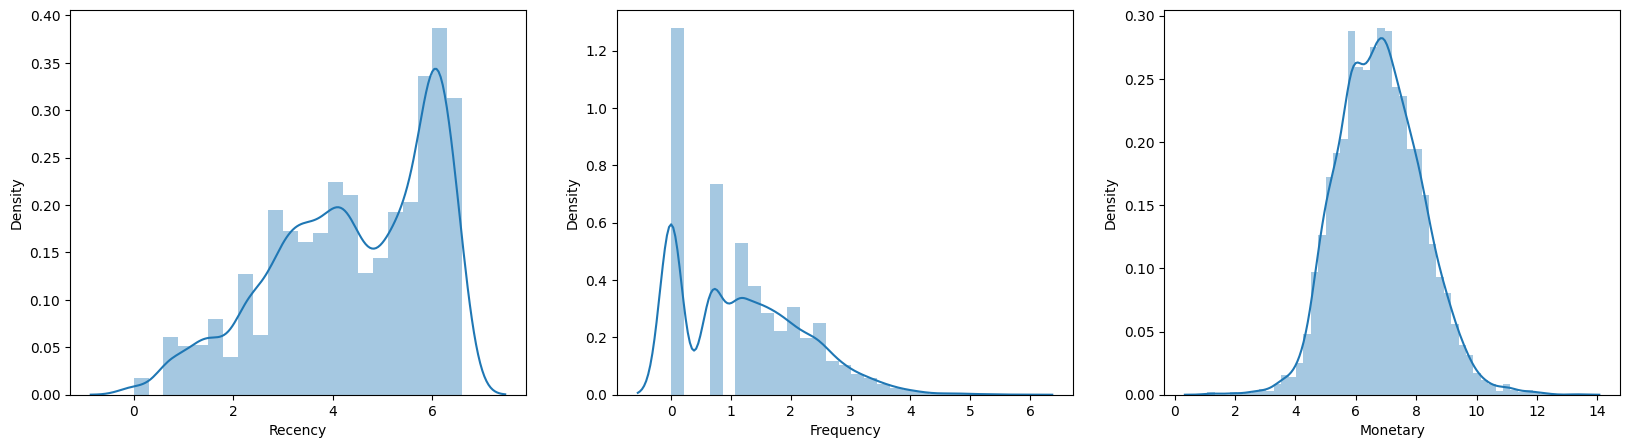

In [ ]:
#Biểu đồ phân phối dữ liệu sau khi sử dụng log tranformation
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm_log['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm_log['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm_log['Monetary'])

In [ ]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000
mean,4.442442,1.208028,6.793477
std,1.596148,1.030144,1.380669
min,0.000000,0.000000,1.082000
25%,3.258000,0.000000,5.817250
50%,4.595000,1.099000,6.745000
75%,5.945000,1.946000,7.702750
max,6.605000,5.817000,13.319000


**Chuẩn hóa dữ liệu**


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns= rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.842456,1.239721,3.234622
1,0.978421,-1.172788,-0.553028
2,1.093709,-0.500003,-0.151011
3,1.159499,-1.172788,-0.908686
4,-2.094890,1.990171,1.696093


**Áp dụng Kmean**
**Sử dụng phương pháp Elbow để xác định số lượng cụm K tối ưu**

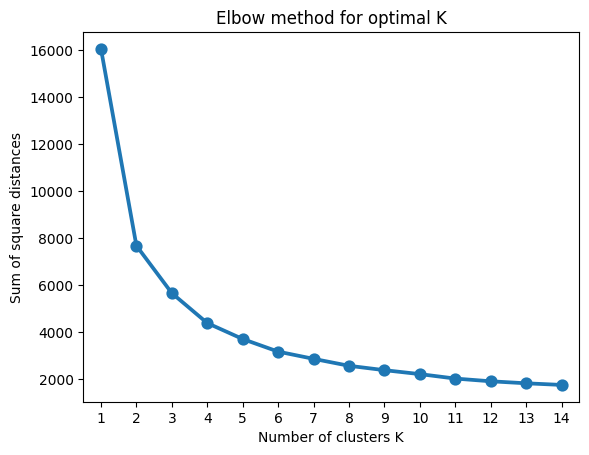

In [ ]:
#wcss là tổng bình phương khoảng cách từ các điểm trong cụm đến tâm cụm
wcss={}

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(rfm_scaled)
    wcss[k] = km.inertia_

#Vẽ biểu đồ
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of square distances')
plt.title('Elbow method for optimal K')
plt.show()

In [ ]:
#Chọn K=4
kmean_model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(rfm_scaled)

#Tìm các cụm
rfm['Cluster'] = kmean_model.labels_

#Kiểm tra dữ liệu
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum,0
1,12608.0,405,1,415.79,4,4,3,443,11,Bronze,2
2,12745.0,487,2,723.85,4,3,3,433,10,Silver,2
3,12746.0,541,1,254.55,4,4,4,444,12,Bronze,2
4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum,0


In [ ]:
rfm.Cluster.value_counts()

,count
Cluster,
2,1803
3,1387
0,1095
1,1065


In [ ]:
#Cụm 0
rfm[rfm['Cluster']==0].describe()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.0
mean,15538.041096,27.221918,18.951598,9803.693111,1.366210,1.115068,1.100457,3.581735,0.0
std,1580.177756,39.903781,21.876679,25362.591538,0.555963,0.324926,0.300745,0.687067,0.0
min,12346.000000,1.000000,2.000000,862.420000,1.000000,1.000000,1.000000,3.000000,0.0
25%,14190.000000,6.000000,9.000000,3053.525000,1.000000,1.000000,1.000000,3.000000,0.0
50%,15555.000000,17.000000,13.000000,4867.720000,1.000000,1.000000,1.000000,3.000000,0.0
75%,16925.500000,32.000000,20.000000,8681.525000,2.000000,1.000000,1.000000,4.000000,0.0
max,18287.000000,498.000000,336.000000,608821.650000,4.000000,3.000000,2.000000,6.000000,0.0


In [ ]:
#Cụm 1
rfm[rfm['Cluster']==1].describe()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.0
mean,15608.105164,28.214085,3.122066,835.371147,1.430047,2.792488,2.722066,6.944601,1.0
std,1578.222537,20.350020,1.627458,536.807675,0.497209,0.689025,0.740689,1.370929,0.0
min,12822.000000,1.000000,1.000000,49.800000,1.000000,1.000000,1.000000,4.000000,1.0
25%,14289.000000,12.000000,2.000000,423.850000,1.000000,2.000000,2.000000,6.000000,1.0
50%,15594.000000,24.000000,3.000000,743.110000,1.000000,3.000000,3.000000,7.000000,1.0
75%,16969.000000,39.000000,4.000000,1115.680000,2.000000,3.000000,3.000000,8.000000,1.0
max,18282.000000,100.000000,14.000000,3861.000000,3.000000,4.000000,4.000000,10.000000,1.0


In [ ]:
#Cụm 2
rfm[rfm['Cluster']==2].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.0
mean,15583.559068,390.540765,1.313367,308.450245,3.462008,3.723239,3.622851,10.808098,2.0
std,1597.125410,194.888360,0.549416,224.209145,0.683623,0.454901,0.531754,1.016949,0.0
min,12608.000000,19.000000,1.000000,2.950000,1.000000,2.000000,2.000000,8.000000,2.0
25%,14198.500000,240.000000,1.000000,152.275000,3.000000,3.000000,3.000000,10.000000,2.0
50%,15564.000000,402.000000,1.000000,258.700000,4.000000,4.000000,4.000000,11.000000,2.0
75%,16972.500000,547.000000,2.000000,403.140000,4.000000,4.000000,4.000000,12.000000,2.0
max,18285.000000,739.000000,4.000000,2135.460000,4.000000,4.000000,4.000000,12.000000,2.0


In [ ]:
#Cụm 3
rfm[rfm['Cluster']==3].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.0
mean,15499.600577,234.297765,5.116078,1832.947006,2.955299,2.163663,1.974766,7.093727,3.0
std,1562.881183,156.776737,2.679126,2114.348357,0.691751,0.677322,0.681712,1.454905,0.0
min,12831.000000,32.000000,1.000000,167.420000,2.000000,1.000000,1.000000,4.000000,3.0
25%,14139.000000,95.000000,3.000000,920.445000,2.000000,2.000000,2.000000,6.000000,3.0
50%,15542.000000,190.000000,4.000000,1388.410000,3.000000,2.000000,2.000000,7.000000,3.0
75%,16808.500000,374.000000,6.000000,2150.020000,3.000000,3.000000,2.000000,8.000000,3.0
max,18286.000000,739.000000,20.000000,44534.300000,4.000000,4.000000,4.000000,10.000000,3.0


<Figure size 500x500 with 0 Axes>

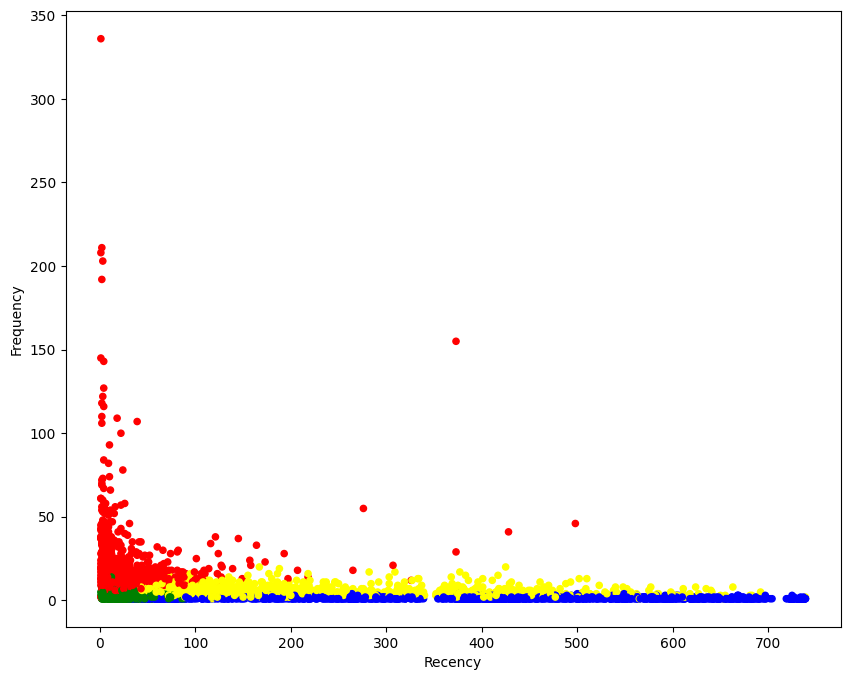

In [ ]:
#Vẽ biểu đồ
plt.figure(figsize=(5,5))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(
    kind="scatter",
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = rfm['Color']
)

In [ ]:
rfm['RFM_Loyalty_Level'].value_counts()

,count
RFM_Loyalty_Level,
Gold,1603
Platinum,1524
Silver,1120
Bronze,1103


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum,0,red
1,12608.0,405,1,415.79,4,4,3,443,11,Bronze,2,blue
2,12745.0,487,2,723.85,4,3,3,433,10,Silver,2,blue
3,12746.0,541,1,254.55,4,4,4,444,12,Bronze,2,blue
4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum,0,red


In [ ]:
rfm.to_excel('RFM_Kmean.xlsx', index=False)

NameError: name 'rfm' is not defined